In [ ]:
!pip install yfinance

In [3]:
import yfinance as yf

datasets = ["TSLA",
            "F",
            "PLTR",
          "AMD",
            "NVDA",
            "BAC",
            "AMZN"

]




for dataset in datasets:
    ticker = yf.Ticker(dataset)
    data = ticker.history(start="2023-08-01", end="2023-08-10")
    filename =f"{dataset}_data.csv"
    data.to_csv(filename)
    print(f"Downloaded data for {dataset} and saved as {filename}.")

Downloaded data for TSLA and saved as TSLA_data.csv.
Downloaded data for F and saved as F_data.csv.
Downloaded data for PLTR and saved as PLTR_data.csv.
Downloaded data for AMD and saved as AMD_data.csv.
Downloaded data for NVDA and saved as NVDA_data.csv.
Downloaded data for BAC and saved as BAC_data.csv.
Downloaded data for AMZN and saved as AMZN_data.csv.


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import seaborn as sns

In [4]:
datasets

['TSLA', 'F', 'PLTR', 'AMD', 'NVDA', 'BAC', 'AMZN']

In [43]:
data = yf.download(datasets, start="2023-08-01", end="2023-08-10")["Adj Close"]

[*********************100%***********************]  7 of 7 completed


In [48]:
data.head()

,AMD,AMZN,BAC,F,NVDA,PLTR,TSLA
Date,,,,,,,
2023-08-01,117.599998,131.690002,31.620001,13.42,465.070007,19.990000,261.070007
2023-08-02,109.349998,128.210007,31.190001,13.04,442.690002,18.969999,254.110001
2023-08-03,113.150002,128.910004,31.410000,13.10,445.149994,18.709999,259.320007
2023-08-04,115.820000,139.570007,31.299999,12.89,446.799988,18.200001,253.860001
2023-08-07,116.809998,142.220001,31.879999,12.94,454.170013,17.990000,251.449997


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2023-08-01 to 2023-08-09
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMD     7 non-null      float64
 1   AMZN    7 non-null      float64
 2   BAC     7 non-null      float64
 3   F       7 non-null      float64
 4   NVDA    7 non-null      float64
 5   PLTR    7 non-null      float64
 6   TSLA    7 non-null      float64
dtypes: float64(7)
memory usage: 448.0 bytes


In [52]:
data.corr()

,AMD,AMZN,BAC,F,NVDA,PLTR,TSLA
AMD,1.000000,0.372468,0.797067,0.461974,0.805992,0.448044,0.477536
AMZN,0.372468,1.000000,0.142665,-0.601855,-0.072578,-0.558067,-0.588122
BAC,0.797067,0.142665,1.000000,0.533441,0.852155,0.617965,0.577864
F,0.461974,-0.601855,0.533441,1.000000,0.800628,0.885161,0.888308
NVDA,0.805992,-0.072578,0.852155,0.800628,1.000000,0.820641,0.778718
PLTR,0.448044,-0.558067,0.617965,0.885161,0.820641,1.000000,0.951746
TSLA,0.477536,-0.588122,0.577864,0.888308,0.778718,0.951746,1.000000


<Axes: >

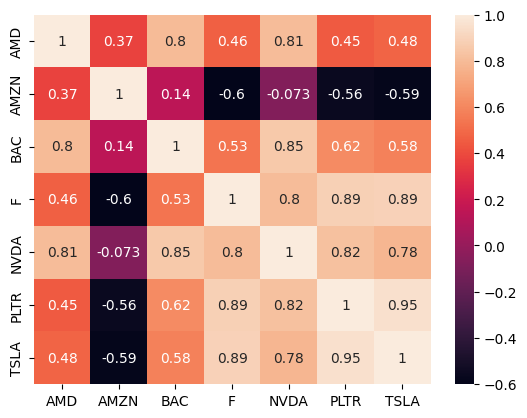

In [56]:
corr= data.corr()
sns.heatmap(corr,annot=True)

In [57]:
data.describe()

,AMD,AMZN,BAC,F,NVDA,PLTR,TSLA
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,113.775714,135.484290,31.361429,13.000000,446.580004,18.021429,253.100002
std,3.141527,5.745229,0.324316,0.220227,11.968005,1.523487,6.286464
min,109.349998,128.210007,30.860001,12.730000,425.540009,15.250000,242.190002
25%,111.810001,130.300003,31.230000,12.885000,443.919998,17.515000,250.574997
50%,113.230003,137.850006,31.299999,12.940000,446.640015,18.200001,253.860001
75%,116.314999,139.755005,31.515000,13.070000,450.485001,18.839999,256.715004
max,117.599998,142.220001,31.879999,13.420000,465.070007,19.990000,261.070007


In [44]:
returns = data.pct_change()

In [45]:
mean_return = returns.mean()
cov_matrix = returns.cov()

In [46]:
def objective(weights):
    portfolio_return = np.sum(mean_return * weights)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_stddev

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
bounds = tuple((0, 1) for _ in range(len(datasets)))
initial_weights = np.array([1 / len(datasets)] * len(datasets))
result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x
portfolio_return = -result.fun
portfolio_stddev = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
<ipython-input-47-b0a44b66ca08>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(results[1,:], results[0,:], results[2,:], cmap='YlGnBu', marker='o')


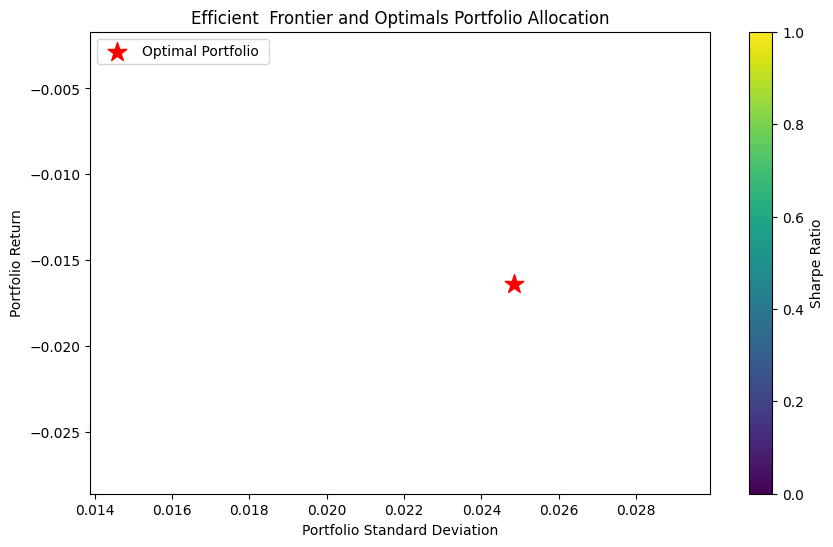

In [47]:
num_portfolios = 1000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(datasets))
    weights /=  np.sum(weights)
    portfolio_return = np.sum(mean_return * weights)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = portfolio_return / portfolio_stddev

plt.figure(figsize=(10,6))
plt.scatter(results[1,:], results[0,:], results[2,:], cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Return')
plt.title('Efficient  Frontier and Optimals Portfolio Allocation')
plt.scatter(portfolio_stddev, portfolio_return, marker='*', color='r', s=200, label='Optimal Portfolio ')
plt.legend()
plt.show()